<a href="https://colab.research.google.com/github/RikiToubkin/PRA_3024/blob/main/LHCb_2024_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to Week 5!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. ![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine.
.

In [1]:
#run this once per kernal crash
!wget https://github.com/MohamedElashri/ROOT/releases/download/ubuntu/root_v6.28.04_Ubuntu_20.04.zip
!unzip /content/root_v6.28.04_Ubuntu_20.04.zip
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
!apt-get install libpython3.6-dev

Streaming output truncated to the last 5000 lines.
  inflating: root_build/tutorials/hsimple.root  
   creating: root_build/tutorials/gui/
  inflating: root_build/tutorials/gui/iconAsXPMData.C  
  inflating: root_build/tutorials/gui/splitterVertical.C  
  inflating: root_build/tutorials/gui/guitest_playback.C  
  inflating: root_build/tutorials/gui/customTH1Fmenu.C  
  inflating: root_build/tutorials/gui/worldmap.jpg  
  inflating: root_build/tutorials/gui/calendar.C  
  inflating: root_build/tutorials/gui/mditest.C  
  inflating: root_build/tutorials/gui/Slider3Demo.C  
  inflating: root_build/tutorials/gui/mditestbg.xpm  
  inflating: root_build/tutorials/gui/textEntries.C  
  inflating: root_build/tutorials/gui/ntupleTableTest.C  
  inflating: root_build/tutorials/gui/customContextMenu.C  
  inflating: root_build/tutorials/gui/splitterHorizontal.C  
  inflating: root_build/tutorials/gui/guiWithCINT.C  
  inflating: root_build/tutorials/gui/CPUMeter.C  
  inflating: root_build/tutori

In [2]:
# Installing uproot due to a deep resentment for ROOT

! pip install uproot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.1/348.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.4/706.4 kB 55.8 MB/s eta 0:00:00


In [3]:
import uproot

In [4]:
# The following is needed because colab upgraded the openssl library
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb

--2024-03-10 19:50:28--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 185.125.190.36, 91.189.91.82, 91.189.91.83, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|185.125.190.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318204 (1.3M) [application/x-debian-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M  1.98MB/s    in 0.6s    

2024-03-10 19:50:29 (1.98 MB/s) - ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’ saved [1318204/1318204]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 121899 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like pro

In [5]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")
import ctypes
ctypes.cdll.LoadLibrary('/content/root_build/lib//libCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libThread.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libTreePlayer.so')


<CDLL '/content/root_build/lib//libTreePlayer.so', handle 56a7658300a0 at 0x7f0b01f55ba0>

Welcome to JupyROOT 6.28/04


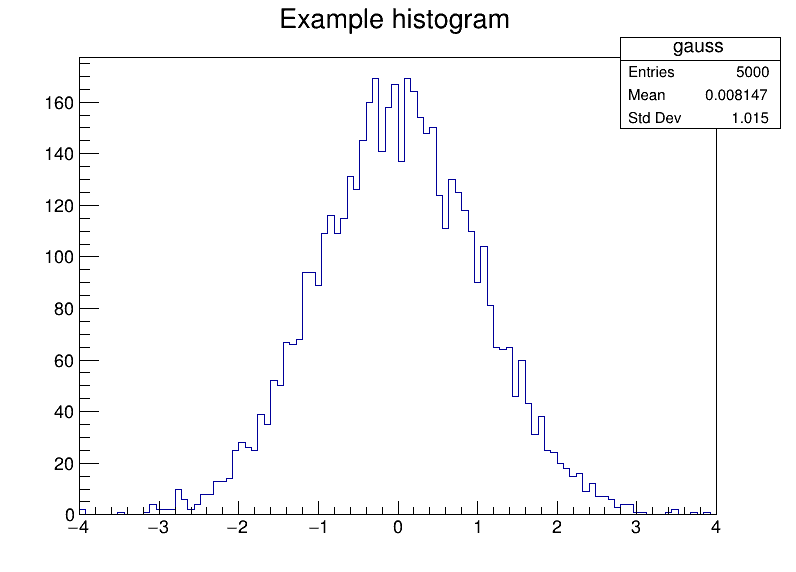

In [6]:
#Now we can check if we have everything working as we expect:
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/17323/files/3634864?module_item_id=644095

Then upload it directly. You can also run the following:

In [7]:
# Using the magnet down data

!mkdir LHCb_Data && cd LHCb_Data && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root

--2024-03-10 19:50:58--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root
Resolving opendata.cern.ch (opendata.cern.ch)... 137.138.6.31, 2001:1458:201:8b::100:1c8
Connecting to opendata.cern.ch (opendata.cern.ch)|137.138.6.31|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 666484974 (636M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetDown.root’

B2HHH_MagnetDown.ro 100%[===================>] 635.61M  27.4MB/s    in 24s     

2024-03-10 19:51:23 (26.5 MB/s) - ‘B2HHH_MagnetDown.root’ saved [666484974/666484974]



[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #0 because H1_PZ cannot accommodate the value 51820.2
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #1 because H1_PX cannot accommodate the value -4985.13
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #2 because H1_PZ cannot accommodate the value 90762.7
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #3 because H1_PY cannot accommodate the value 3413.79
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data) Ignored 4967545 out-of-range events


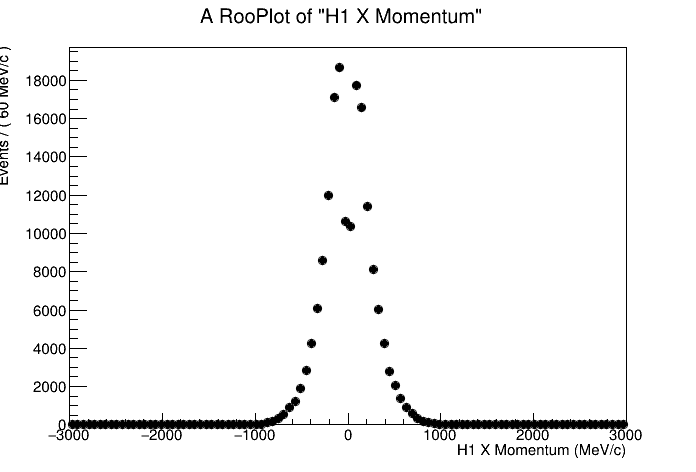

In [8]:
#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!

f = ROOT.TFile.Open("/content/LHCb_Data/B2HHH_MagnetDown.root", "READONLY")
#From our file, we have to extract the DecayTree
tree=f.Get("DecayTree")
#Now we can grab some variables as a test:
H1_ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",-3000,3000,"MeV/c")
H1_xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",-3000,3000,"MeV/c")
H1_zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",-3000,3000,"MeV/c")
# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(H1_xmomentum,H1_ymomentum,H1_zmomentum), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("c","c")
frame = H1_xmomentum.frame()
data.plotOn(frame)
frame.Draw()
c.Draw()

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable called H1_Ptot

In [9]:
# Calulating the total momentum of each of the three daughters.

import matplotlib.pyplot as plt
import numpy as np

root_file = uproot.open("/content/LHCb_Data/B2HHH_MagnetDown.root")  # using uproot to open the ROOT file
tree2 = root_file["DecayTree"]
H1_PX = tree2.arrays("H1_PX")
H1_PY = tree2.arrays("H1_PY")
H1_PZ = tree2.arrays("H1_PZ")
H1_tot = np.sqrt(H1_PX["H1_PX"]**2 + H1_PY["H1_PY"]**2 + H1_PZ["H1_PZ"]**2)  # calculating total momentum (3 axes)


H2_PX = tree2.arrays("H2_PX")
H2_PY = tree2.arrays("H2_PY")
H2_PZ = tree2.arrays("H2_PZ")
H2_tot = np.sqrt(H2_PX["H2_PX"]**2 + H2_PY["H2_PY"]**2 + H2_PZ["H2_PZ"]**2)

H3_PX = tree2.arrays("H3_PX")
H3_PY = tree2.arrays("H3_PY")
H3_PZ = tree2.arrays("H3_PZ")
H3_tot = np.sqrt(H3_PX["H3_PX"]**2 + H3_PY["H3_PY"]**2 + H3_PZ["H3_PZ"]**2)

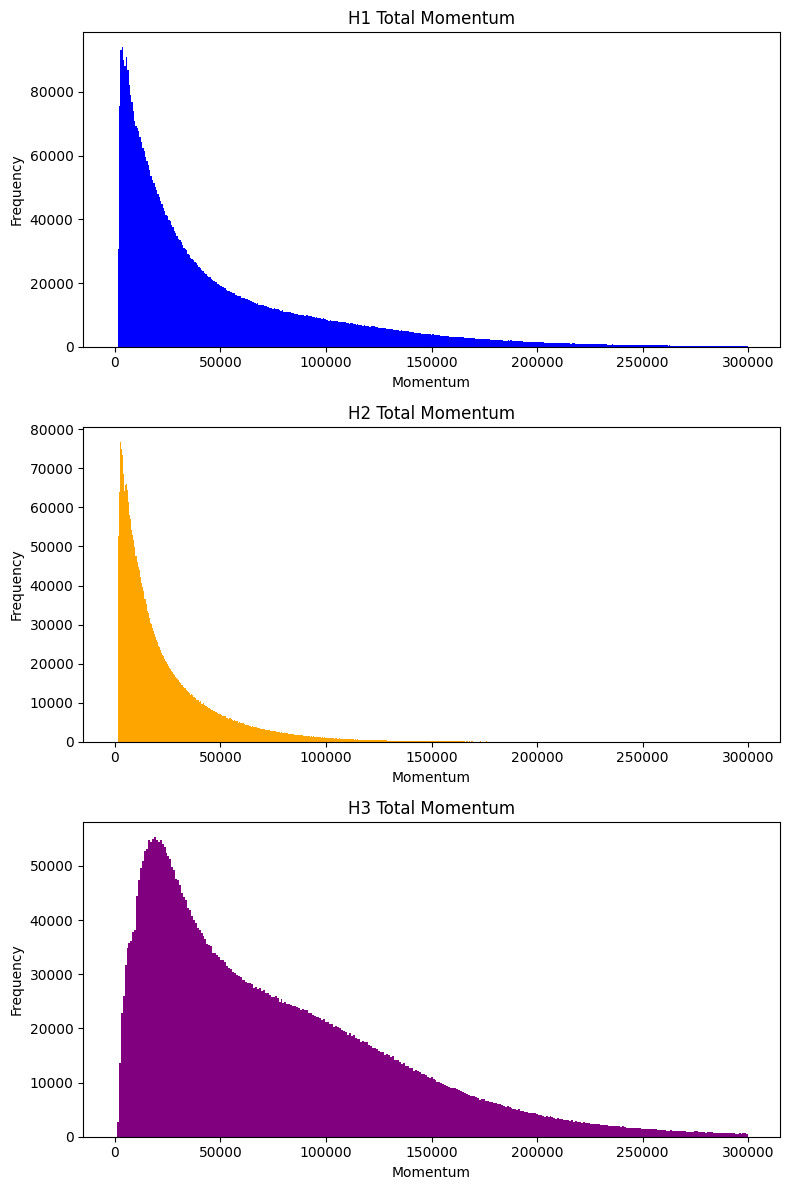

In [10]:
#Plotting the total momentum of each of the three daughters.

import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Histogram for H1_tot
axs[0].hist(H1_tot, bins='auto', range=(0, 300000), color='blue')
axs[0].set_title('H1 Total Momentum')
axs[0].set_xlabel("Momentum")
axs[0].set_ylabel("Frequency")

# Histogram for H2_tot
axs[1].hist(H2_tot, bins='auto', range=(0, 300000), color='orange')
axs[1].set_title('H2 Total Momentum')
axs[1].set_xlabel("Momentum")
axs[1].set_ylabel("Frequency")

# Histogram for H3_tot
axs[2].hist(H3_tot, bins='auto', range=(0, 300000), color='purple')
axs[2].set_title('H3 Total Momentum')
axs[2].set_xlabel("Momentum")
axs[2].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

Now plot the total momentum for the mother (M_Ptot)

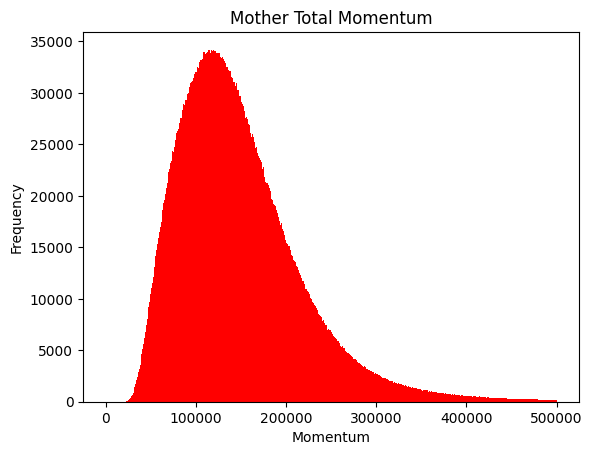

In [11]:
# Caluclating and plotting the total momentum of the mother

mother_x = H1_PX["H1_PX"] + H2_PX["H2_PX"] + H3_PX["H3_PX"]
mother_y = H1_PY["H1_PY"] + H2_PY["H2_PY"] + H3_PY["H3_PY"]
mother_z = H1_PZ["H1_PZ"] + H2_PZ["H2_PZ"] + H3_PZ["H3_PZ"]

mother_tot = np.sqrt(mother_x**2 + mother_y**2 + mother_z**2)

plt.hist(mother_tot, bins='auto', color ='red', range = (0,500000));
plt.title("Mother Total Momentum");
plt.xlabel("Momentum");
plt.ylabel('Frequency');

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [12]:
tree.Show(47)

======> EVENT:47
 B_FlightDistance = 3.72815
 B_VertexChi2    = 5.61629
 H1_PX           = 862.215
 H1_PY           = -2642.12
 H1_PZ           = 92294
 H1_ProbK        = 0.102745
 H1_ProbPi       = 0.768332
 H1_Charge       = 1
 H1_IPChi2       = 1.57766
 H1_isMuon       = 0
 H2_PX           = 925.856
 H2_PY           = -92.5749
 H2_PZ           = 6286.23
 H2_ProbK        = 0.00532818
 H2_ProbPi       = 0.9855
 H2_Charge       = -1
 H2_IPChi2       = 657.191
 H2_isMuon       = 0
 H3_PX           = 236.466
 H3_PY           = -2237.45
 H3_PZ           = 71205.3
 H3_ProbK        = 0.943872
 H3_ProbPi       = 0.0971285
 H3_Charge       = -1
 H3_IPChi2       = 1.11619
 H3_isMuon       = 0


We have now completed the initial steps and begun to work through what we need to with the data. This is a perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energy, we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

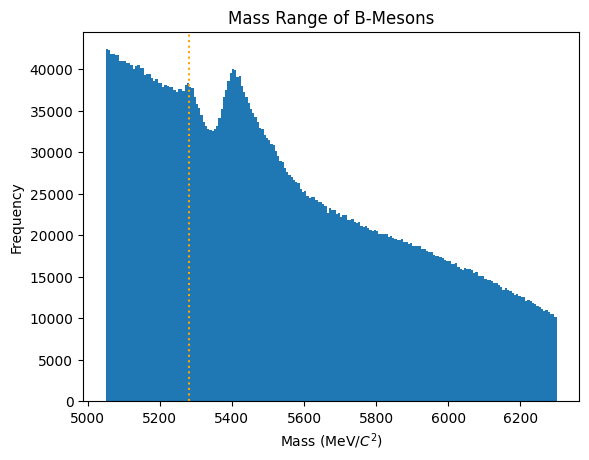

First peak at 5280 MeV/$C^2$


In [14]:
#Plotting a histogram of the range of masses of the B meson.

H1_mass = H2_mass = H3_mass = 493.7  # value sourced from http://hyperphysics.phy-astr.gsu.edu/hbase/Particles/kaon.html

H1_energy = np.sqrt(H1_tot**2 + H1_mass ** 2);  # using c = 1, E^2 = m^2 + p^2
H2_energy= np.sqrt(H2_tot**2 + H2_mass ** 2);
H3_energy = np.sqrt(H3_tot**2 + H3_mass ** 2);

total_energy = H1_energy + H2_energy + H3_energy;

mother_energy = total_energy;  # conservation of energy

mother_mass = np.sqrt(mother_energy ** 2 - mother_tot ** 2);

plt.hist(mother_mass, bins='auto');
plt.title("Mass Range of B-Mesons")
plt.xlabel("Mass (MeV/$C^2$)")
plt.ylabel("Frequency")
plt.axvline(x=5280, color='orange', linestyle=':')
plt.show()
print("First peak at 5280 MeV/$C^2$")


The typical mass of a B-Meson is 5279.65 ± 0.12 MeV/c^2 and the first peak of this mass distributiion occurs at 5280 MeV/c^2, this almost perfectly matches what we would expect from theory.

We know that some of our particles are the B+ and some are the B- particle. There will also be some particles in our system that are not coming from a genuine B+/- or are a B+/- but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

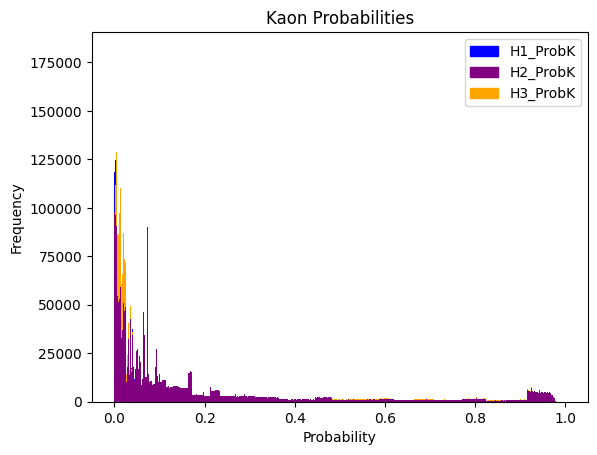

In [15]:
# Plotting th H1/H2/H3_ProbK

from matplotlib.patches import Patch

H1_ProbK = tree2.arrays("H1_ProbK")
H2_ProbK = tree2.arrays("H2_ProbK")
H3_ProbK = tree2.arrays("H3_ProbK")
legend_labels = ['H1_ProbK', 'H2_ProbK', 'H3_ProbK']
legend_colors = ['blue', 'purple', 'orange']
legend_handles = [Patch(color=color, label=label) for label, color in zip(legend_labels, legend_colors)]

plt.hist(H1_ProbK["H1_ProbK"], bins=1000, color = 'blue', range = (0,1));
plt.hist(H2_ProbK["H2_ProbK"], bins=1000, color = 'orange', range = (0,1));
plt.hist(H3_ProbK["H3_ProbK"], bins=1000, color = 'purple', range = (0,1));
plt.title("Kaon Probabilities")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.legend(handles=legend_handles)
plt.show()

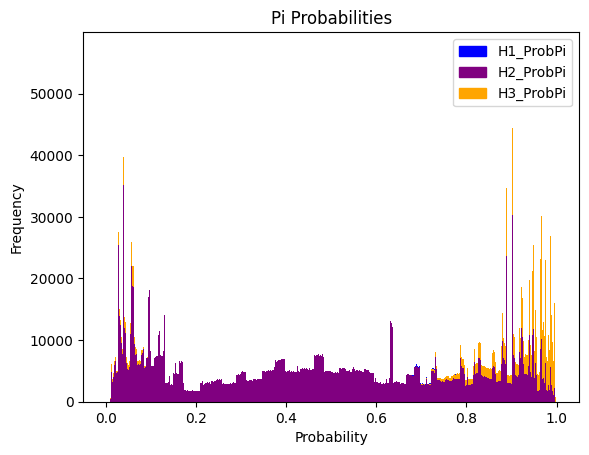

In [17]:
# Plotting the H1/H2/H3_ProbPi

H1_ProbPi = tree2.arrays("H1_ProbPi")
H2_ProbPi = tree2.arrays("H2_ProbPi")
H3_ProbPi = tree2.arrays("H3_ProbPi")
legend_labels = ['H1_ProbPi', 'H2_ProbPi', 'H3_ProbPi']
legend_colors = ['blue', 'purple', 'orange']
legend_handles = [Patch(color=color, label=label) for label, color in zip(legend_labels, legend_colors)]

plt.hist(H1_ProbPi["H1_ProbPi"], bins=1000, color = 'blue', range = (0,1));
plt.hist(H2_ProbPi["H2_ProbPi"], bins=1000, color = 'orange', range = (0,1));
plt.hist(H3_ProbPi["H3_ProbPi"], bins=1000, color = 'purple', range = (0,1));
plt.title("Pi Probabilities")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.legend(handles=legend_handles)
plt.show()

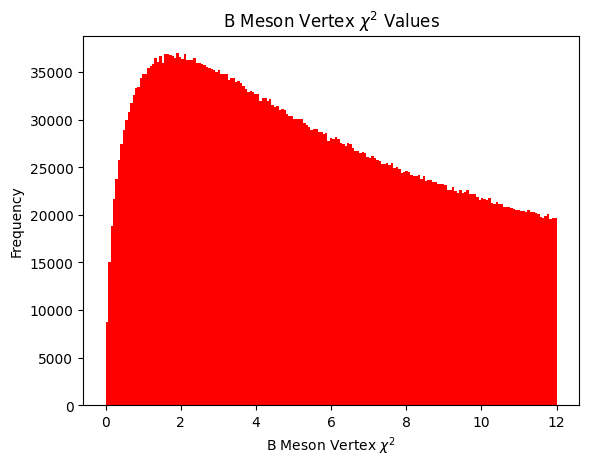

In [18]:
# Plot of the B_VertexChi2 for the mother particle

B_VertexChiSquared = tree2.arrays("B_VertexChi2")
plt.hist(B_VertexChiSquared["B_VertexChi2"], bins='auto', color = 'red');
plt.title("B Meson Vertex ${\chi^2}$ Values")
plt.ylabel("Frequency")
plt.xlabel("B Meson Vertex ${\chi^2}$")
plt.show()

Using these plots, we can now make a preselection string. This is a text string that looks like

In [19]:
H1_isMuon = tree2.arrays("H1_isMuon")
H2_isMuon = tree2.arrays("H2_isMuon")
H3_isMuon = tree2.arrays("H3_isMuon")

In [21]:
# This selection is for each daughter particle to have a Probability of being a Kaon greater than the probability of being a Pion. Additionally, all daughter particles must not be muons and the B Meson Vertex Chi squared value must be less than 4.
# This selection has been made to filter out the false Kaon readings and hopefully produce a profile that only contains the B-Mesons that decayed into Kaons and that we have a high confidence that these kaons came from the same B-Meson decay(B Vertex Chi value).

selection=("(H1_ProbK>H1_ProbPi) & (H2_ProbK>H2_ProbPi) & (H3_ProbK>H3_ProbPi) & (H1_isMuon == 0) & (H2_isMuon == 0) & (H3_isMuon == 0) & (B_VertexChi2 < 4)")

In [22]:
# Applying the selection
CutTree = tree2.arrays(cut=selection)

In [23]:
# Confirming that values were cut
print(len(H1_ProbK))
print(len(CutTree))

5135823
17921


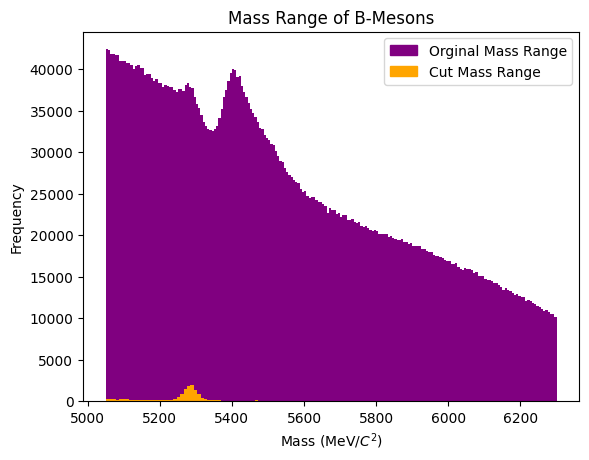

In [24]:
# Doing the momentum, energy and mass calculations using the cut data.

H1_tot_CUT = np.sqrt(CutTree["H1_PX"]**2 + CutTree["H1_PY"]**2 + CutTree["H1_PZ"]**2)
H2_tot_CUT = np.sqrt(CutTree["H2_PX"]**2 + CutTree["H2_PY"]**2 + CutTree["H2_PZ"]**2)
H3_tot_CUT = np.sqrt(CutTree["H3_PX"]**2 + CutTree["H3_PY"]**2 + CutTree["H3_PZ"]**2)

mother_x_CUT = CutTree["H1_PX"] + CutTree["H2_PX"] + CutTree["H3_PX"]
mother_y_CUT = CutTree["H1_PY"] + CutTree["H2_PY"] + CutTree["H3_PY"]
mother_z_CUT = CutTree["H1_PZ"] + CutTree["H2_PZ"] + CutTree["H3_PZ"]

mother_tot_CUT = np.sqrt(mother_x_CUT**2 + mother_y_CUT**2 + mother_z_CUT**2)

H1_mass = H2_mass = H3_mass = 493.7

H1_energy_CUT = np.sqrt(H1_tot_CUT**2 + H1_mass ** 2);
H2_energy_CUT = np.sqrt(H2_tot_CUT**2 + H2_mass ** 2);
H3_energy_CUT = np.sqrt(H3_tot_CUT**2 + H3_mass ** 2);

total_energy_CUT = H1_energy_CUT + H2_energy_CUT + H3_energy_CUT;

mother_energy_CUT = total_energy_CUT;

mother_mass_CUT = np.sqrt(mother_energy_CUT ** 2 - mother_tot_CUT ** 2);

# Plotting the mother mass range along with the new cut mass range.

plt.hist(mother_mass, bins='auto', color = 'purple');
plt.hist(mother_mass_CUT, bins='auto', color = 'orange');
legend_labels = ['Orginal Mass Range', 'Cut Mass Range']
legend_colors = ['purple', 'orange']
legend_handles = [Patch(color=color, label=label) for label, color in zip(legend_labels, legend_colors)]
plt.legend(handles=legend_handles)
plt.title("Mass Range of B-Mesons")
plt.xlabel("Mass (MeV/$C^2$)")
plt.ylabel("Frequency")
plt.show()

The orange section of the graph represents the B meson mass calculated using the cut data. This shows that our selection was succesful as we have managed to remove the strange second peak and are only left with an exponential decay around our signal. This observation is made more clear in the next figure which only shows the cut-mass range.

#How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

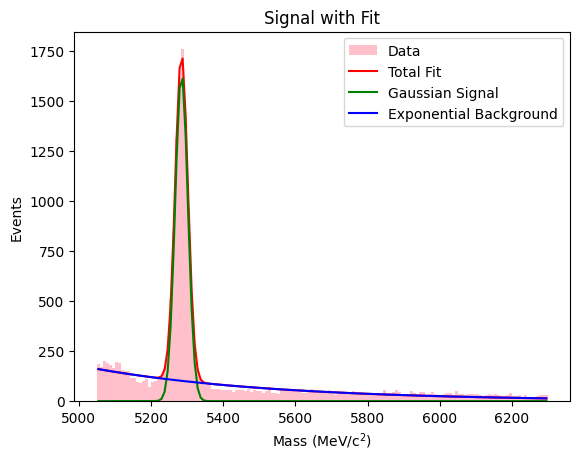

Signal yield: 8654.133563343563 ± 499.9034162455374
Chi Squared Value: 5.683116124071954


In [26]:
# Plotting the fit data to identify the signal.

import numpy as np
from scipy.stats import chisquare
from scipy.stats import norm
from scipy.optimize import curve_fit

def model_gauss(x, amplitude, mean, stddev):  # Expect a Gaussian distribution from the shape of our previous figure.
    return amplitude*np.exp(-(x - mean)**2 / (2 * stddev**2))
def model_exp(x,amplitude,decay):  # Expect exponential decay of background noise from our previous figure.
    return amplitude*np.exp(-decay*x)
def model_curve(x,amp_gauss,mean,stddev,amp_exp,decay):
    return model_exp(x,amp_exp,decay)+model_gauss(x,amp_gauss,mean,stddev)  # The model curve is a combination of the Gaussian showing the signal and the exponential background.

bins=150
bin_contents, bin_edges = np.histogram(mother_mass_CUT, bins=bins)
y_data=np.array(bin_contents)
x_data=np.array((bin_edges[:-1] + bin_edges[1:])/2)
guess_vals=[8.67718565e+02, 5.28413710e+03, 1.78036081e+01, 3.47542433e+06, 2.11392879e-03] # Guesses for initial values.
fit_vals, cov = curve_fit(model_curve, x_data, y_data, guess_vals) # Fitted values, returns the optimized parameters (fit_vals) and the covariance matrix (cov) representing the uncertainties in the parameters.
y_fit = model_curve(x_data, *fit_vals)

# Calculating the signal yield (number of events matching the criteria). Done by taking the area under the Gaussian curve.

event_num = 0
for i in x_data:
  event_num+=model_gauss(i, *fit_vals[:3])

# Calculating the Chi-Square manually. This was needed because while ROOT has this as a built in fucntion, SciPy does not. Suggestions from ChatGpt were used.

residuals = y_data - model_curve(x_data, *fit_vals)  # differences between the observed data (y_data) and the model predictions
ss_res = np.sum(residuals**2)  #calculates the sum of squares of the residuals
ss_tot = np.sum((y_data - np.mean(y_data))**2) # calculates the total sum of squares, measuring the variability of the data points around their mean value
r_squared = 1 - (ss_res / ss_tot) # calculating r squared value
chi_square = np.sum((residuals**2) / model_curve(x_data, *fit_vals))
reduced_chi_square = chi_square / (len(y_data) - len(fit_vals))

# Calculating the error in the signal yield using the amplitude error.

amplitude_error = np.sqrt(np.diag(cov))[0]  # Error in the amplitude from the covariance matrix
signal_error = amplitude_error * np.sqrt(2 * np.pi) * fit_vals[2]

# Plotting the histogram, the fitted curve, and the model curves

plt.hist(mother_mass_CUT, bins=bins, label='Data', color = 'pink')
plt.plot(x_data, y_fit, label='Total Fit', color='r')
plt.plot(x_data, model_gauss(x_data, *fit_vals[:3]), label='Gaussian Signal', color='g')
plt.plot(x_data, model_exp(x_data, *fit_vals[3:]), label='Exponential Background', color='b')
plt.xlabel('Mass (MeV/c$^2$)')
plt.ylabel('Events')
plt.title('Signal with Fit')
plt.legend()
plt.show()

print(f"Signal yield: {event_num} ± {signal_error}")
print("Chi Squared Value: " + str(reduced_chi_square))

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do all):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

We can use the .getValV() function on our signal and background *normalisation* components, e.g. Gauss_Norm=Gauss.getValV()

To find the error (on this number) we can use .getError()

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

The fit is relatively good, however, there is a sizable error attached.
Upon calcualting the chi squared value we see that it has decreased from the orignal B-Meson Vertex Chi value and the relatively low value suggests a relatively high degree of accuracy. Thus, we can be relatively sure that these B-Mesons decayed into Kaons.

#Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

In [27]:
H1_Charge_array = CutTree["H1_Charge"]
H2_Charge_array = CutTree["H2_Charge"]
H3_Charge_array = CutTree["H3_Charge"]

In [28]:
#With this way of testing it automatically excludes masses of 0 positive or 3 positive particle events. Thanks Rally for this piece of code.
charge_test_pos = np.where((H1_Charge_array+H2_Charge_array+H3_Charge_array)==1)
# Extract the corresponding cutMass values for B+
B_positiveMass = np.take(mother_mass_CUT, charge_test_pos[0])
charge_test_neg = np.where((H1_Charge_array+H2_Charge_array+H3_Charge_array)==-1)
# Extract the corresponding cutMass values for B+
B_negativeMass = np.take(mother_mass_CUT, charge_test_neg[0])

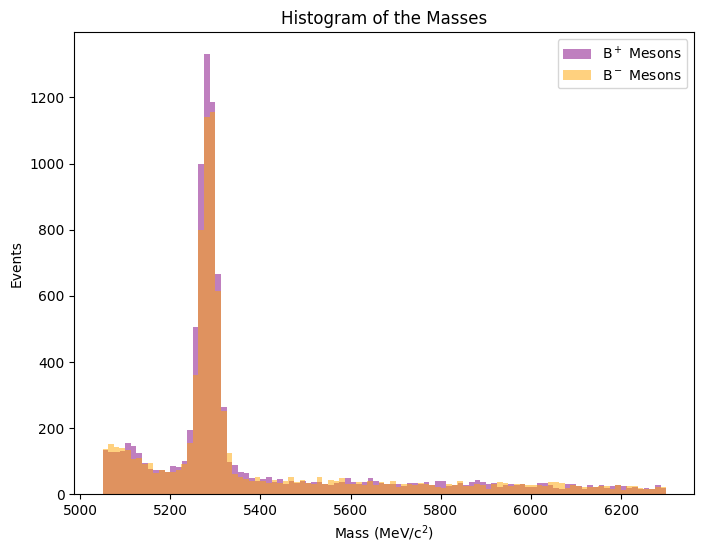

In [30]:
# Plotting the B+ and B- meson mass ranges

plt.figure(figsize=(8,6))
plt.hist(B_positiveMass, bins=100, color='purple',alpha=0.5,label="B$^+$ Mesons");
plt.hist(B_negativeMass, bins=100, color='orange',alpha=0.5,label="B$^-$ Mesons");
plt.xlabel('Mass (MeV/c$^2$)');
plt.ylabel('Events');
plt.legend()
plt.title('Histogram of the Masses');

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

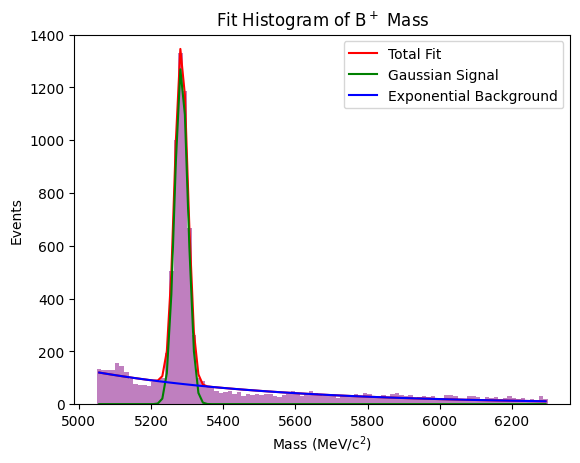

Signal yield: 4680.363030525626 ± 521.9650930921316


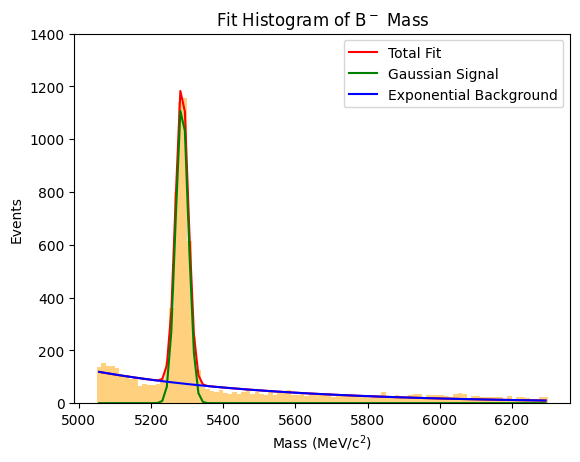

Signal yield: 3999.923506585908 ± 468.8176857019109


In [32]:
# Seperating the plots and fitting them with Gaussian curves and exponential backgrounds.

bins=100
bin_contents, bin_edges = np.histogram(B_positiveMass, bins=bins)
y_data=np.array(bin_contents)
x_data=np.array((bin_edges[:-1] + bin_edges[1:])/2)
guess_vals=[8.67718565e+02, 5.28413710e+03, 1.78036081e+01, 3.47542433e+06,
 2.11392879e-03]

amplitude_error_pos = np.sqrt(np.diag(cov))[0]  # Error in the amplitude from the covariance matrix
signal_error_pos = amplitude_error_pos * np.sqrt(2 * np.pi) * fit_vals[2]  # calculating the error on the signal yield

fit_vals, cov = curve_fit(model_curve, x_data, y_data, guess_vals)
y_fit= model_curve(x_data, *fit_vals)
plt.ylim(0, 1400)
signal=model_gauss(x_data,*fit_vals[:3])
plt.hist(B_positiveMass,bins=bins, color='purple', alpha = 0.5);
plt.plot(x_data, y_fit, label='Total Fit', color='r')
plt.xlabel('Mass (MeV/c$^2$)');
plt.ylabel('Events');
plt.plot(x_data, model_gauss(x_data, *fit_vals[:3]), label='Gaussian Signal', color='g')
plt.plot(x_data, model_exp(x_data, *fit_vals[3:]), label='Exponential Background', color='b')
plt.title("Fit Histogram of B$^+$ Mass")
plt.legend()
plt.show()

event_num_pos = 0
for i in x_data:
  event_num_pos+=model_gauss(i, *fit_vals[:3])

print(f"Signal yield: {event_num_pos} ± {signal_error_pos}")

bins=100
bin_contents, bin_edges = np.histogram(B_negativeMass, bins=bins)
y_data=np.array(bin_contents)
x_data=np.array((bin_edges[:-1] + bin_edges[1:])/2)
guess_vals=[8.67718565e+02, 5.28413710e+03, 1.78036081e+01, 3.47542433e+06,
 2.11392879e-03]

amplitude_error_neg = np.sqrt(np.diag(cov))[0]  # Error in the amplitude from the covariance matrix
signal_error_neg = amplitude_error_neg * np.sqrt(2 * np.pi) * fit_vals[2] # calculating the error on the signal yield

fit_vals, cov = curve_fit(model_curve, x_data, y_data, guess_vals)
y_fit= model_curve(x_data, *fit_vals)
plt.ylim(0, 1400)
signal=model_gauss(x_data,*fit_vals[:3])
plt.hist(B_negativeMass,bins=bins, color='orange', alpha = 0.5);
plt.plot(x_data, y_fit, label='Total Fit', color='r')
plt.xlabel('Mass (MeV/c$^2$)');
plt.ylabel('Events');
plt.plot(x_data, model_gauss(x_data, *fit_vals[:3]), label='Gaussian Signal', color='g')
plt.plot(x_data, model_exp(x_data, *fit_vals[3:]), label='Exponential Background', color='b')
plt.title("Fit Histogram of B$^-$ Mass")
plt.legend()
plt.show()

event_num_neg = 0
for i in x_data:
  event_num_neg+=model_gauss(i, *fit_vals[:3])

print(f"Signal yield: {event_num_neg} ± {signal_error_neg}")

In [33]:
# Calculating A and Sigma A as per the provided equation above.

A = (event_num_neg - event_num_pos)/(event_num_neg + event_num_pos)
print("A Value: " + str(A))
sigma_A = np.sqrt((1-A**2)/(event_num_neg + event_num_pos))
print("Sigma A Value: " + str(sigma_A))

A Value: -0.07838906250739297
Sigma A Value: 0.01070026458404351


Sine the A value is negative, we can see that there are more B+ mesons than B-mesons present in our data set. This result seems reasonable due to the low SigmaA value. Additionally, this value is in line with theory as it suggests that there is an excess of matter rather than anti-matter in the Universe.

#Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?